## **1.Import Necessary Libraries**

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Setting basic styles for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## **2.Load the Dataset**

In [2]:
# Load the dataset from the same directory
df = pd.read_excel("Delinquency_prediction_dataset.xlsx")

# Preview the first 5 rows
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


## **3.Check Basic Information**

In [3]:
# Check the basic info: columns, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

## **4.Quick Descriptive Statistics For the Dataset**

In [4]:
# Basic statistical summary of numerical columns
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


## **5.Checking for Missing Values**

In [5]:
# Check missing values in each column
missing_values = df.isnull().sum()

# Display columns with at least 1 missing value
missing_values = missing_values[missing_values > 0]

# Show results
missing_values

Income          39
Credit_Score     2
Loan_Balance    29
dtype: int64

## **6.Visualize Missing Data Matrix**

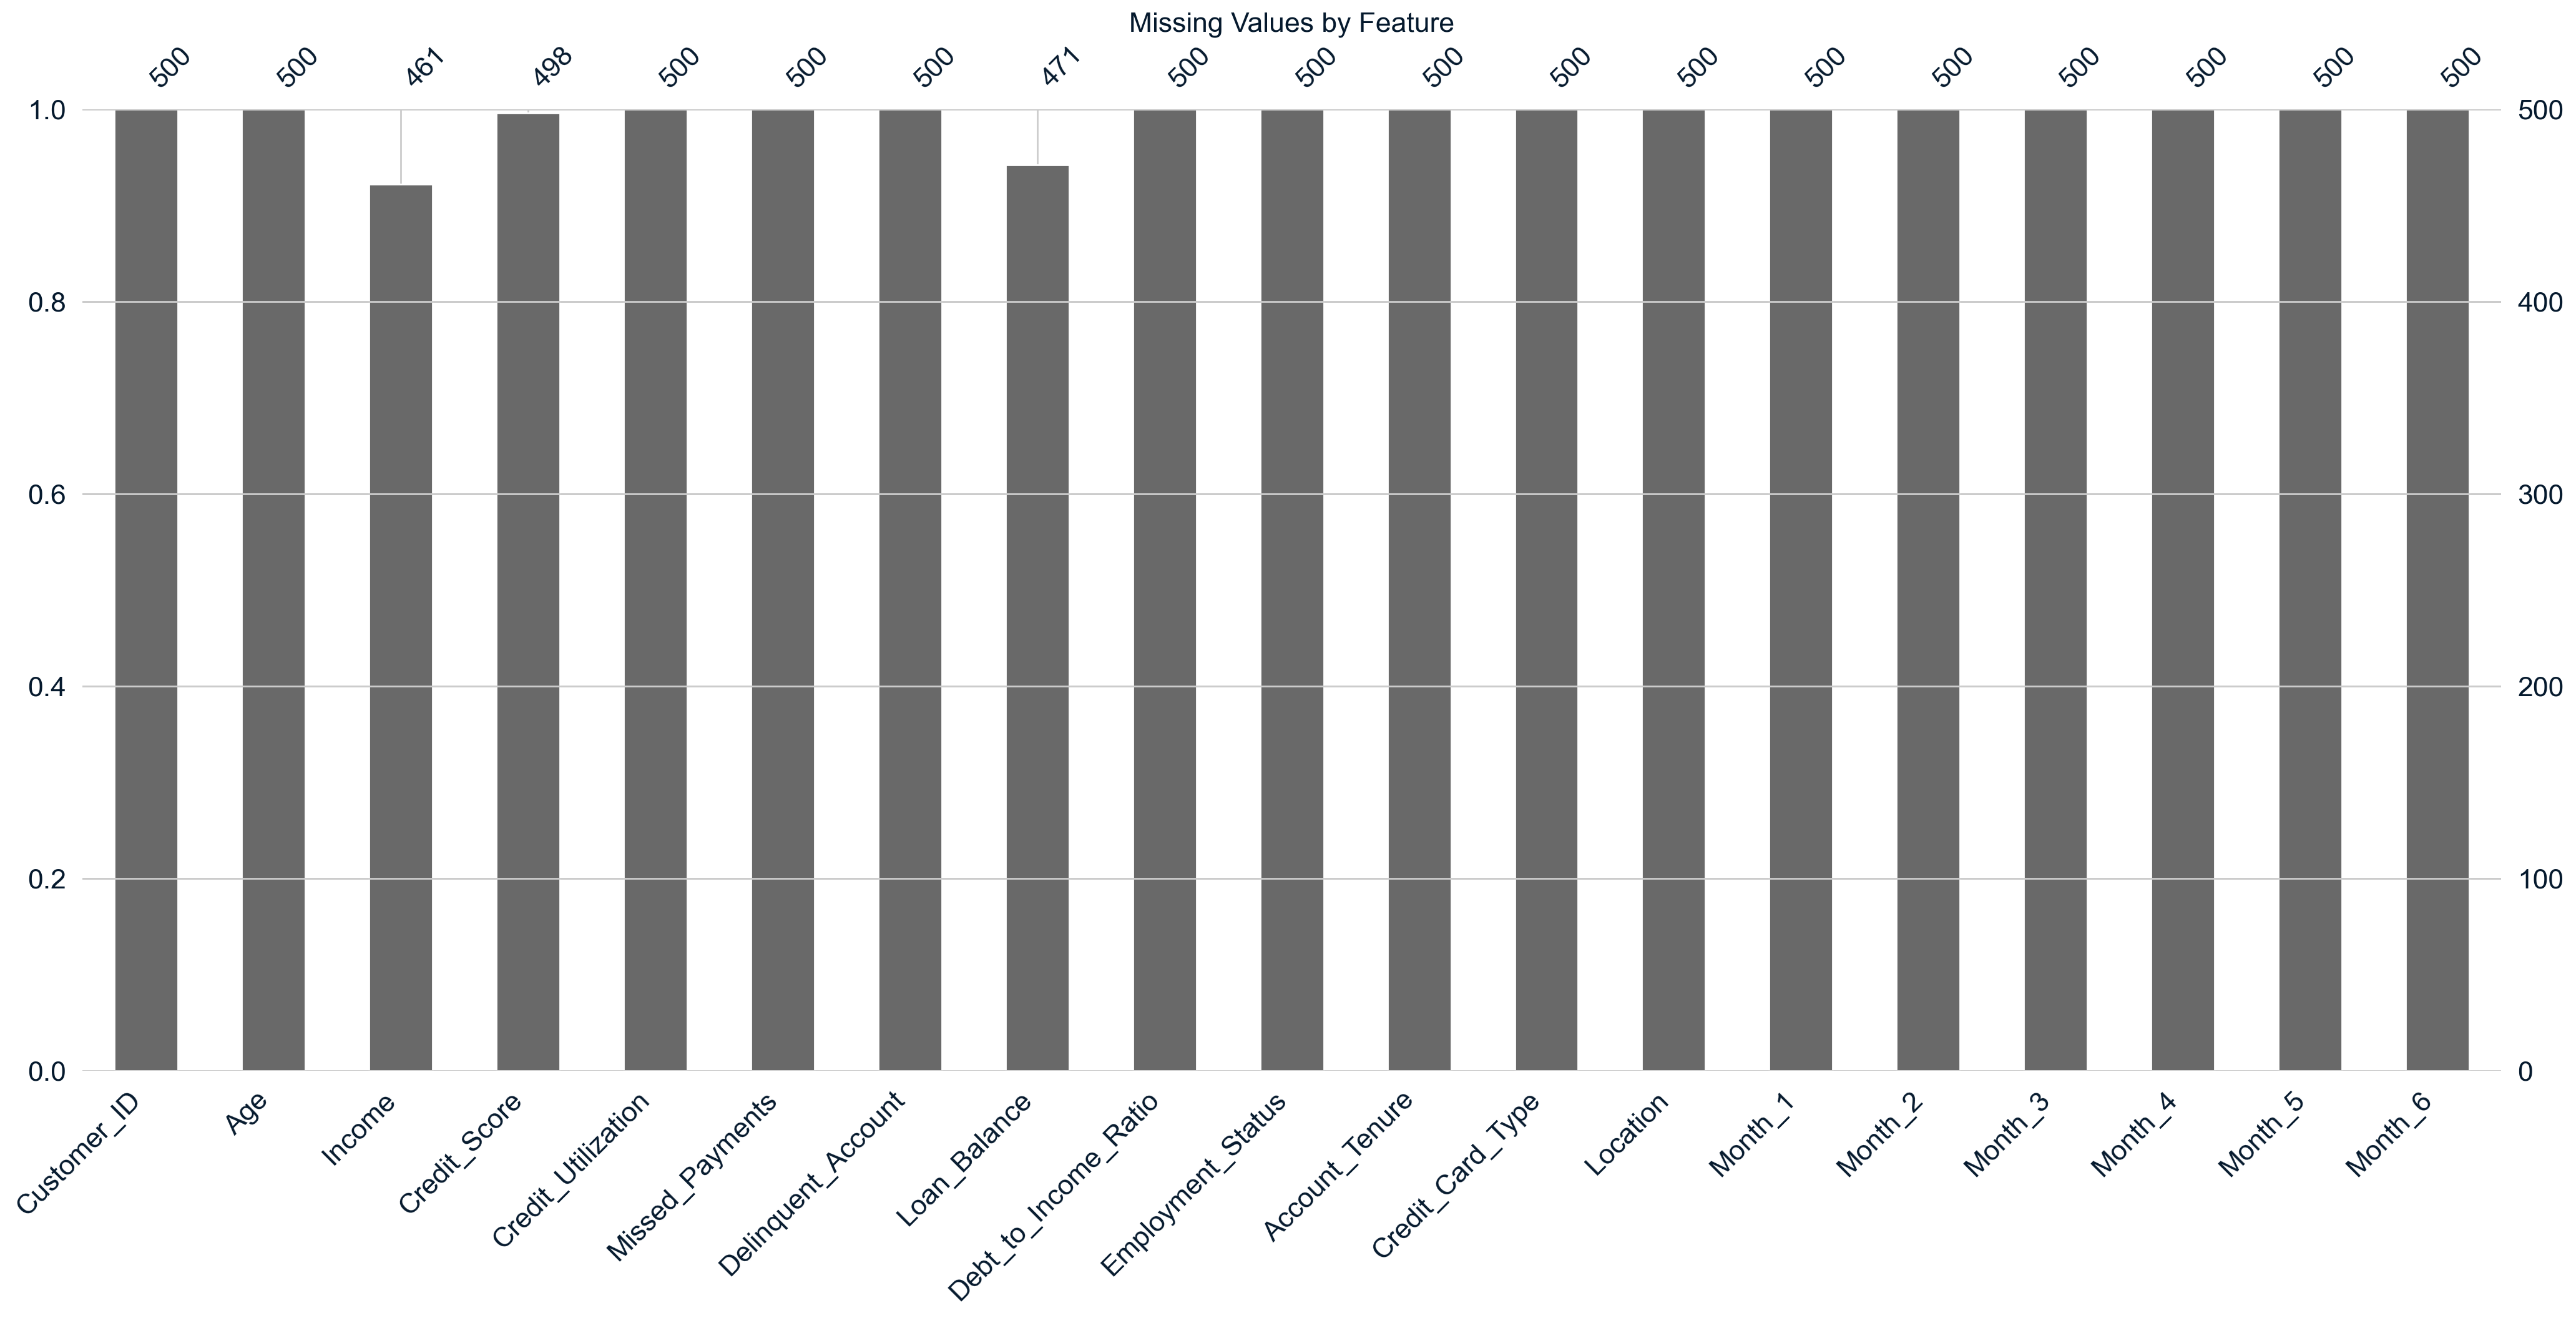

In [6]:
#If you didn't install missingno, install it first via "pip install missingno"
import missingno as msno

# Bar chart of missing values
msno.bar(df)
plt.title("Missing Values by Feature", fontsize=16)
plt.show()

## **7.Missing Values Summary Table**

In [7]:
# Create a missing values summary table
missing_summary = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': (missing_values.values / len(df) * 100).round(2)
})

missing_summary.sort_values('Missing_Percent', ascending=False)

,Feature,Missing_Count,Missing_Percent
0,Income,39,7.8
2,Loan_Balance,29,5.8
1,Credit_Score,2,0.4


## **8.Describe the Data (Summary Statistics)**

In [8]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,46.266000,16.187629,18.00,33.000000,46.500000,59.250000,74.000000
Income,461.0,108379.893709,53662.723741,15404.00,62295.000000,107658.000000,155734.000000,199943.000000
Credit_Score,498.0,577.716867,168.881211,301.00,418.250000,586.000000,727.250000,847.000000
Credit_Utilization,500.0,0.491446,0.197103,0.05,0.356486,0.485636,0.634440,1.025843
Missed_Payments,500.0,2.968000,1.946935,0.00,1.000000,3.000000,5.000000,6.000000
Delinquent_Account,500.0,0.160000,0.366973,0.00,0.000000,0.000000,0.000000,1.000000
Loan_Balance,471.0,48654.428875,29395.537273,612.00,23716.500000,45776.000000,75546.500000,99620.000000
Debt_to_Income_Ratio,500.0,0.298862,0.094521,0.10,0.233639,0.301634,0.362737,0.552956
Account_Tenure,500.0,9.740000,5.923054,0.00,5.000000,10.000000,15.000000,19.000000


## **9.Visualize Distributions**

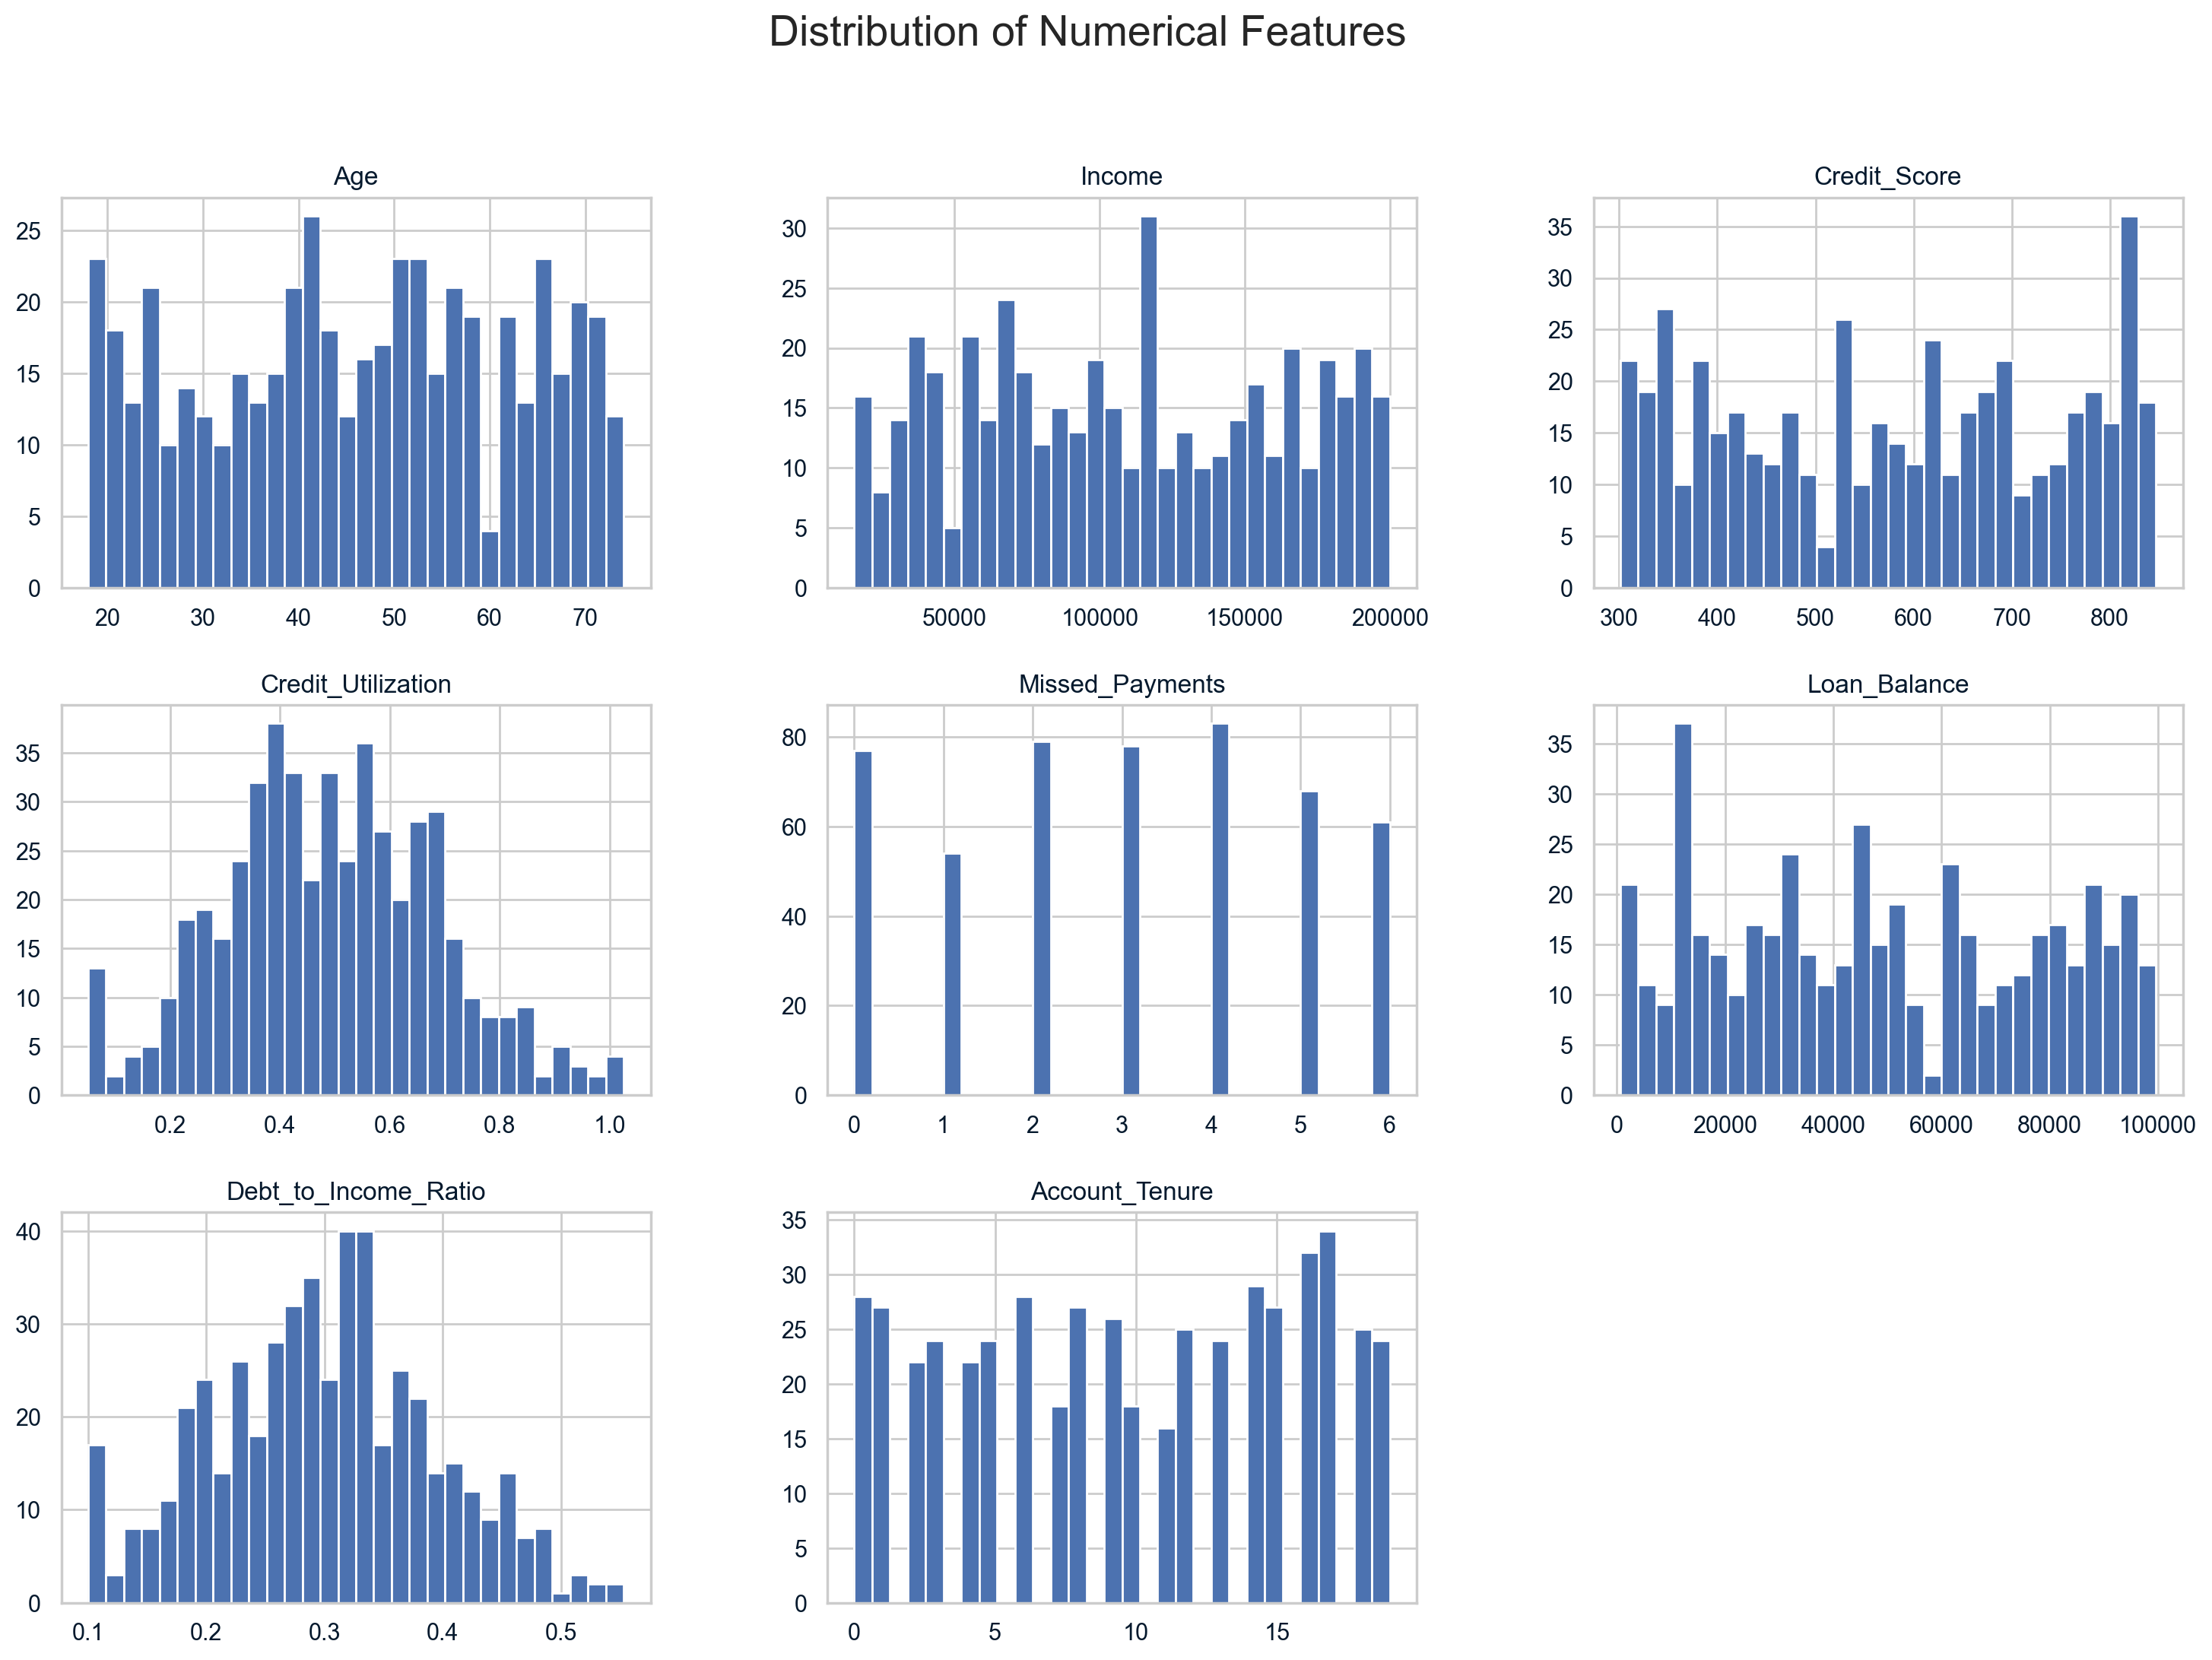

In [9]:
# Plot histograms for numerical features
numeric_features = [
    'Age', 'Income', 'Credit_Score', 'Credit_Utilization', 
    'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio', 
    'Account_Tenure'
]

df[numeric_features].hist(bins=30, figsize=(18,12), layout=(3, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.show()


## **10.Detect and Highlight Anomalies**

In [10]:
# Check for extreme values (potential anomalies)

# Define thresholds
anomalies = {}

# Example thresholds (based on realistic assumptions)
anomalies['Income > 200k'] = df[df['Income'] > 200000]
anomalies['Credit_Utilization > 1.0'] = df[df['Credit_Utilization'] > 1.0]
anomalies['Debt_to_Income_Ratio > 1.0'] = df[df['Debt_to_Income_Ratio'] > 1.0]
anomalies['Age < 18 or Age > 100'] = df[(df['Age'] < 18) | (df['Age'] > 100)]

# Display anomalies
for title, subset in anomalies.items():
    print(f"\n{title}: {len(subset)} records")
    display(subset)



Income > 200k: 0 records


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6



Credit_Utilization > 1.0: 4 records


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
89,CUST0090,65,127856.0,361.0,1.025843,2,0,2200.0,0.346267,EMP,14,Standard,Chicago,On-time,Late,On-time,Missed,Missed,On-time
265,CUST0266,72,16062.0,584.0,1.025017,1,0,92285.0,0.240017,Unemployed,17,Gold,Phoenix,Missed,Late,Missed,Missed,On-time,Late
292,CUST0293,49,38061.0,316.0,1.002482,1,0,95267.0,0.448824,Employed,16,Student,Chicago,Late,Late,Late,Late,Missed,Missed
426,CUST0427,49,163216.0,768.0,1.008734,6,0,60530.0,0.452937,EMP,15,Gold,New York,Late,On-time,Missed,Late,Late,Missed



Debt_to_Income_Ratio > 1.0: 0 records


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6



Age < 18 or Age > 100: 0 records


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6


## **11.Correlation Heatmap (Numerical Features)**

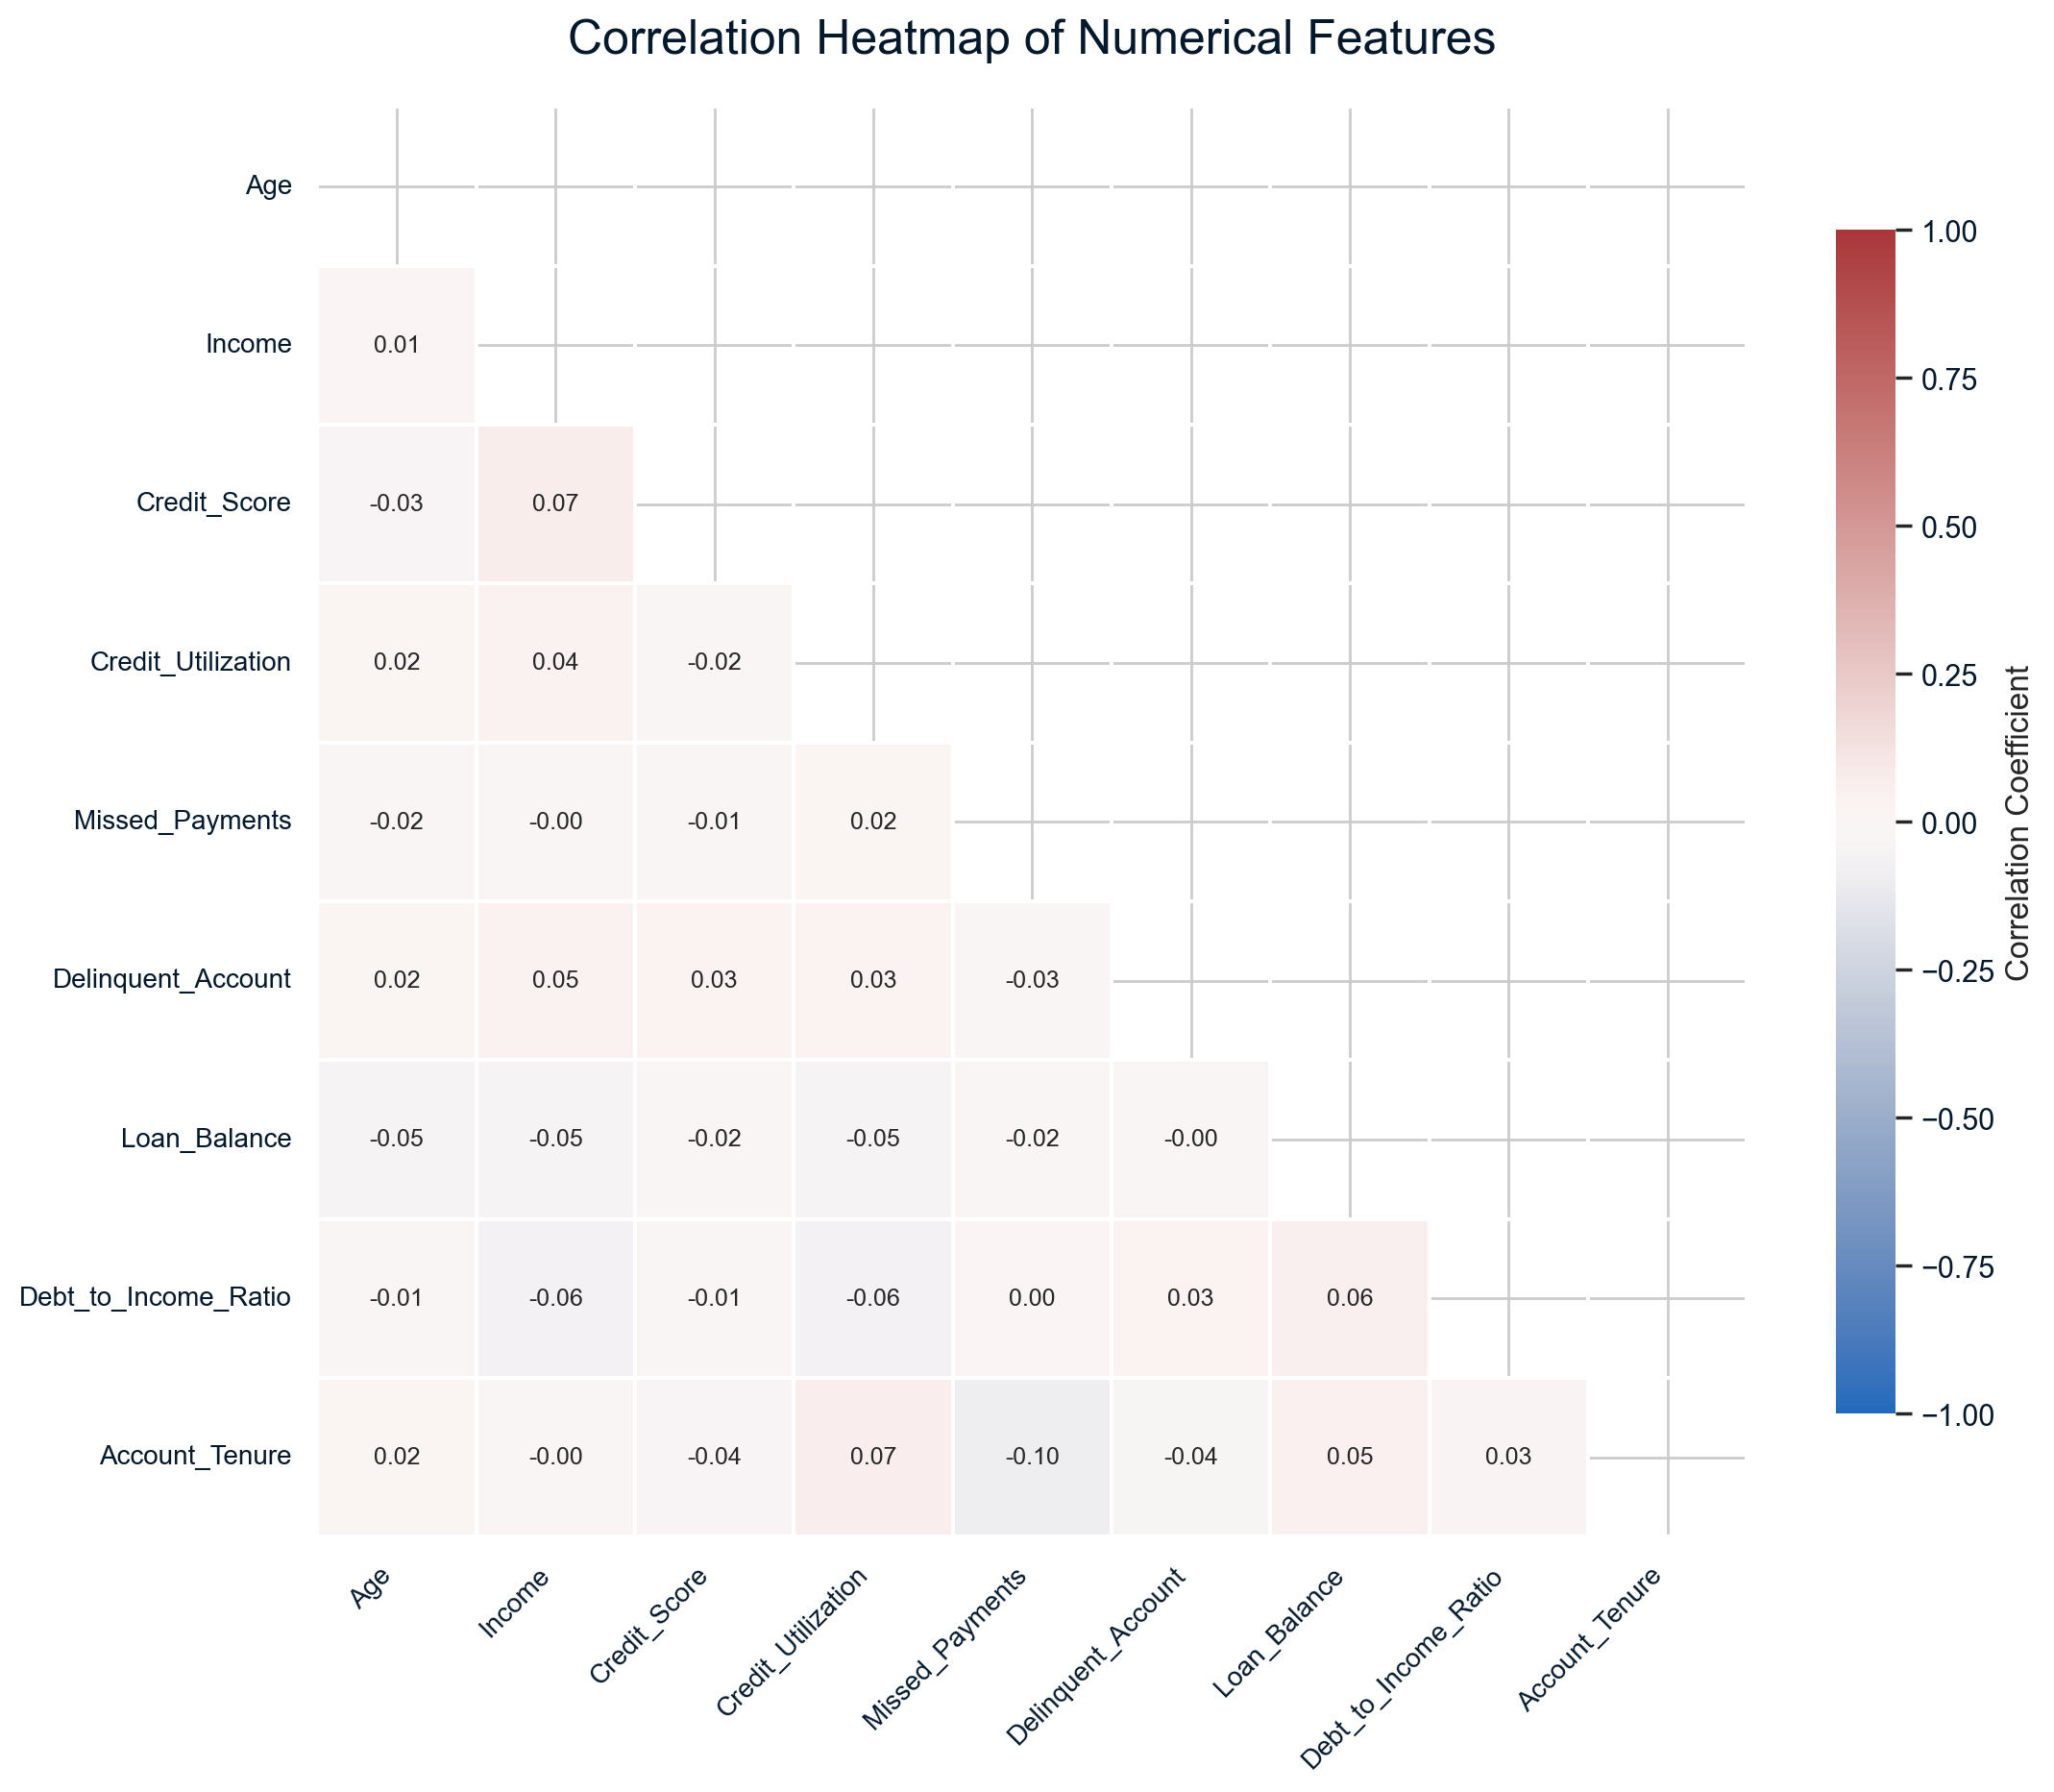

In [11]:
# 5.1 Neater version of Correlation Heatmap

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle (to avoid duplicate information)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap="vlag",  # Better diverging color palette
    vmax=1.0, 
    vmin=-1.0,
    center=0,
    square=True, 
    linewidths=0.75, 
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot=True, 
    fmt=".2f",
    annot_kws={"size": 9}
)

# Titles and labels
plt.title("Correlation Heatmap of Numerical Features", fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()


## **12.Boxplots for Key Risk Factors**

Text(0.5, 1.02, 'Key Feature Distributions by Delinquency')

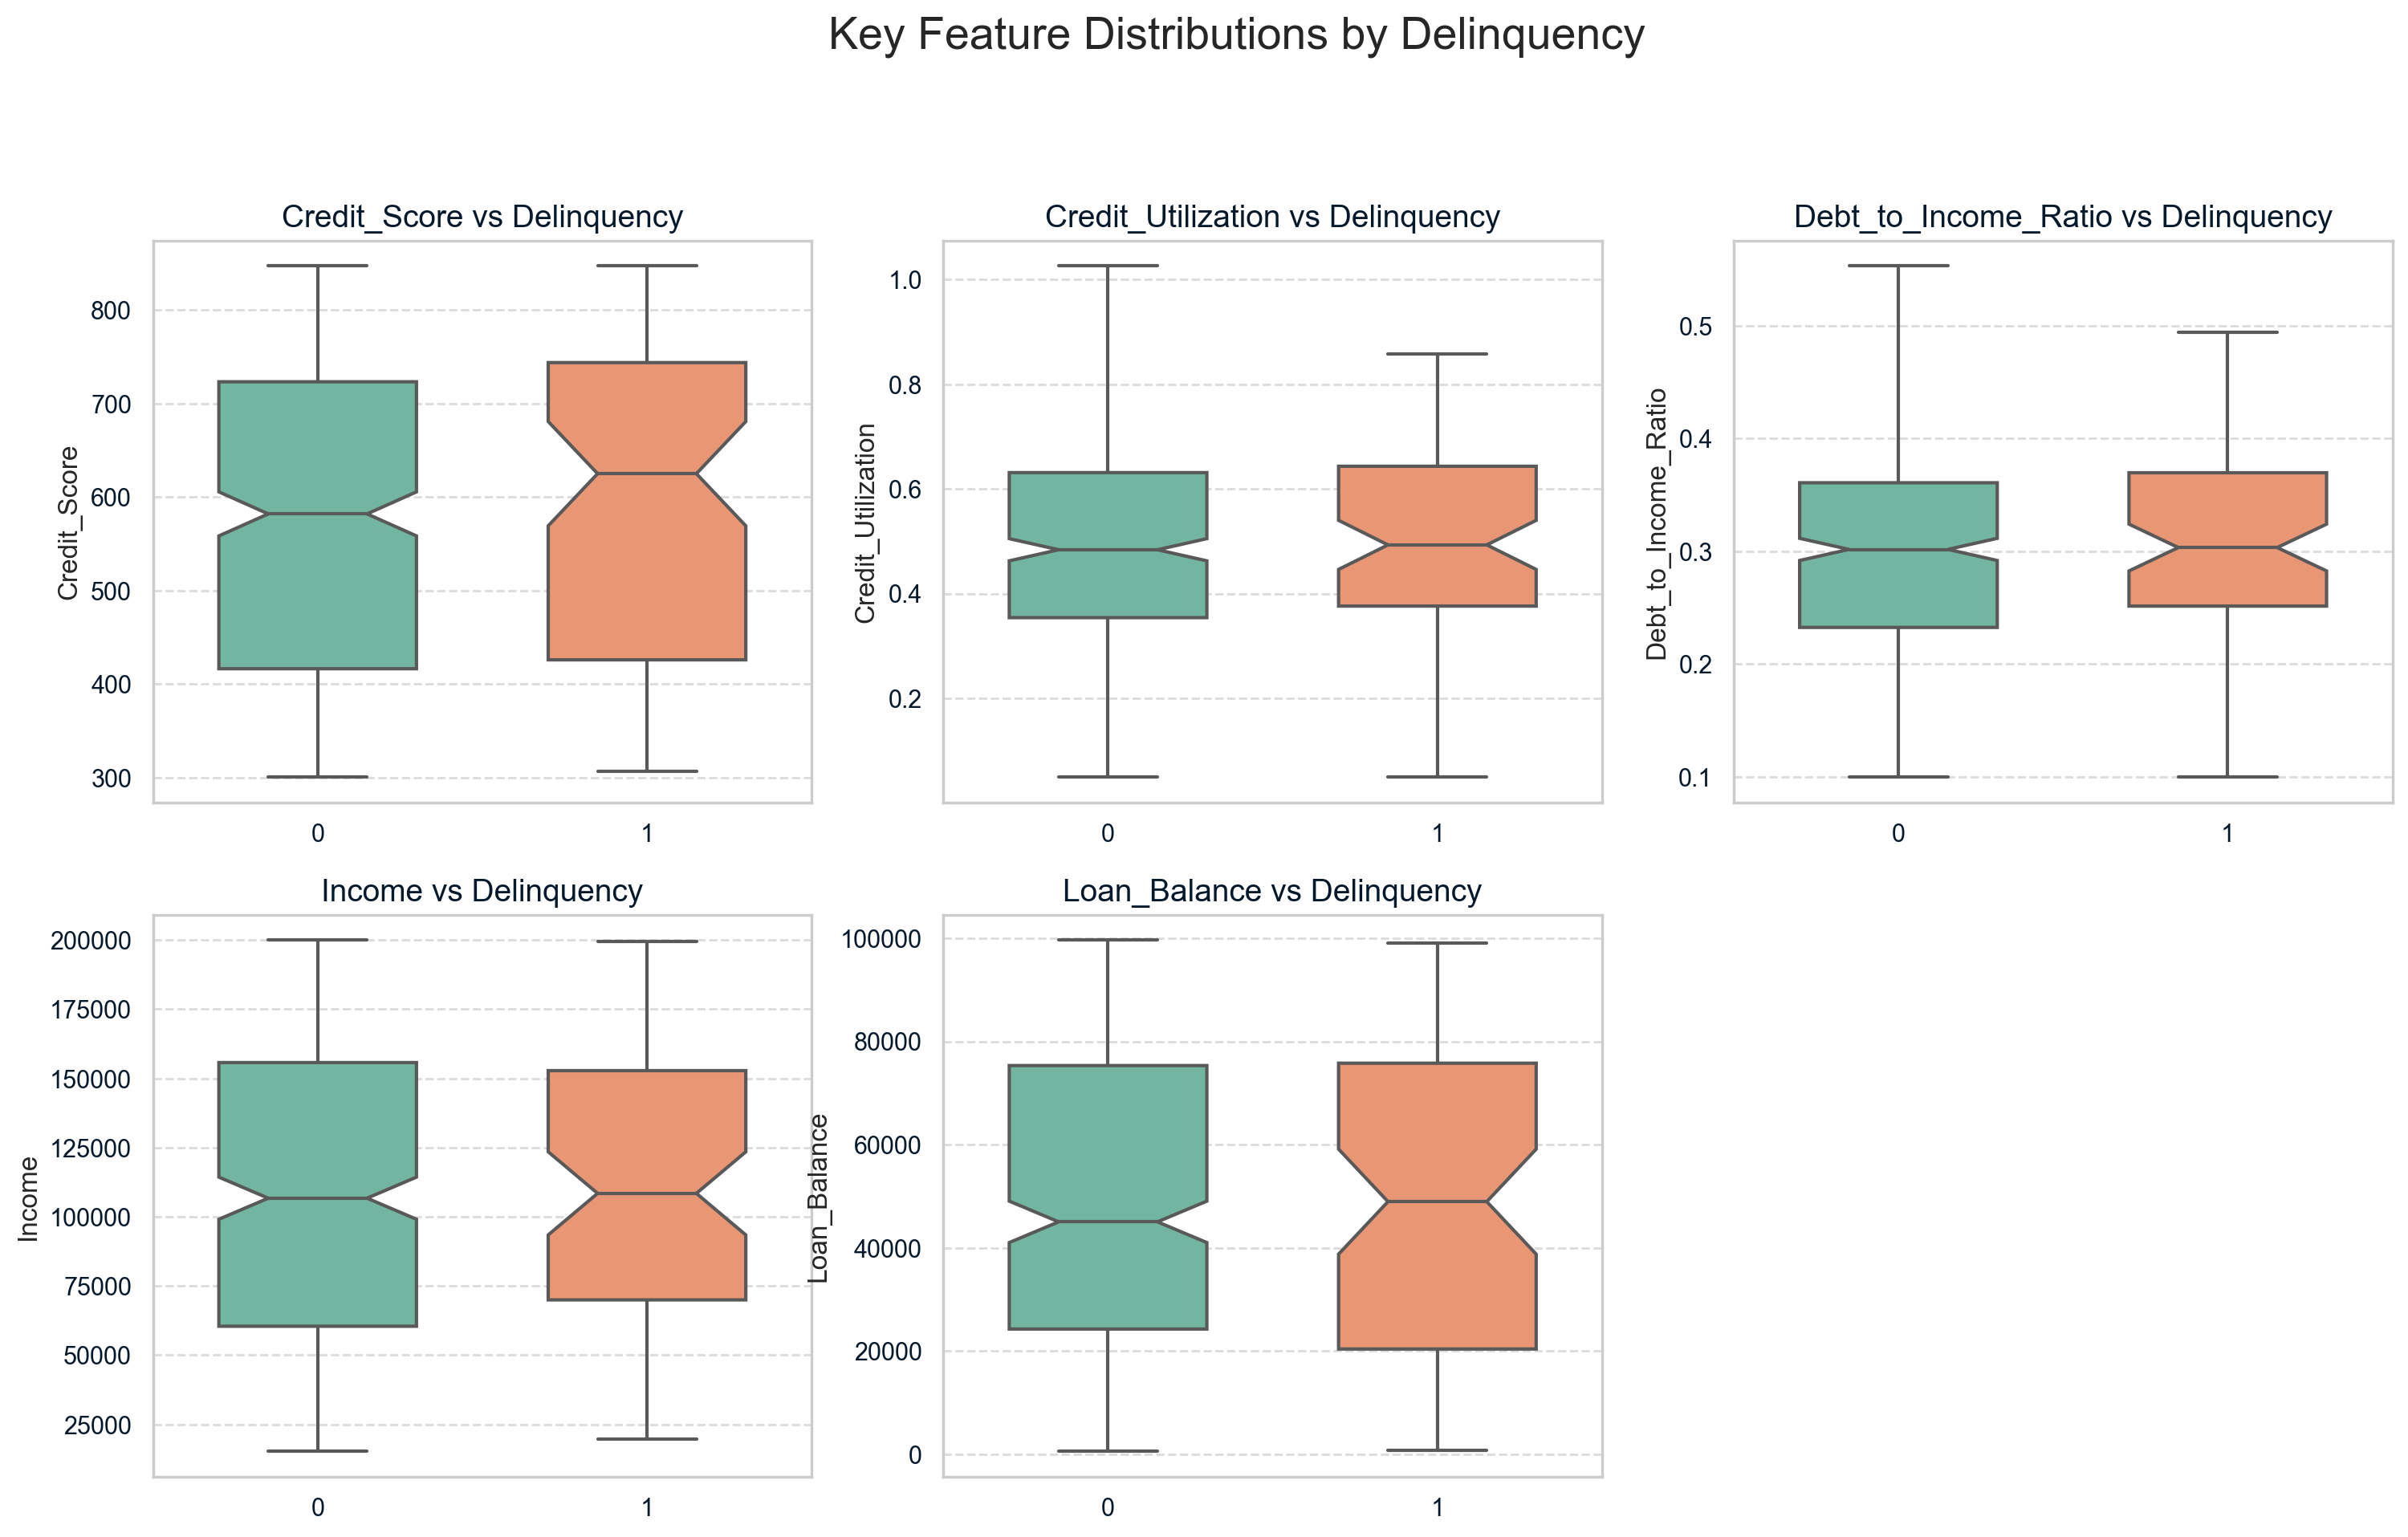

In [12]:

key_features = ['Credit_Score', 'Credit_Utilization', 'Debt_to_Income_Ratio', 'Income', 'Loan_Balance']

# Create subplots grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(key_features):
    sns.boxplot(
        x='Delinquent_Account',
        y=feature,
        hue='Delinquent_Account',
        data=df,
        palette="Set2",
        notch=True,
        width=0.6,
        linewidth=1.5,
        dodge=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Delinquency", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend([], [], frameon=False)  # Hide legend

# Hide the last empty subplot if needed
for j in range(len(key_features), len(axes)):
    fig.delaxes(axes[j])

# Overall adjustments
plt.suptitle("Key Feature Distributions by Delinquency", fontsize=20, y=1.02)


## **13.Grouped Risk Factor Analysis**

In [13]:
# Group by Delinquent_Account and calculate mean for numeric features only

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Group by Delinquent_Account
risk_summary = numeric_df.groupby(df['Delinquent_Account']).mean()

# Display nicely
risk_summary.T


Delinquent_Account,0,1
Age,46.107143,47.100000
Income,107306.943005,113902.013333
Credit_Score,575.145933,591.150000
Credit_Utilization,0.488505,0.506887
Missed_Payments,2.990476,2.850000
Delinquent_Account,0.000000,1.000000
Loan_Balance,48708.756281,48358.232877
Debt_to_Income_Ratio,0.297445,0.306301
Account_Tenure,9.842857,9.200000


## **14.Create New Risk Flags**

In [14]:
# Flag high credit utilization
df['High_Credit_Utilization'] = (df['Credit_Utilization'] > 0.7).astype(int)

# Flag high debt-to-income ratio
df['High_DTI'] = (df['Debt_to_Income_Ratio'] > 0.4).astype(int)

# Flag low credit score
df['Low_Credit_Score'] = (df['Credit_Score'] < 500).astype(int)

# Flag short account tenure
df['Short_Account_Tenure'] = (df['Account_Tenure'] < 12).astype(int)

# Flag missing income
df['Income_Missing_Flag'] = df['Income'].isnull().astype(int)

# Preview
df[['High_Credit_Utilization', 'High_DTI', 'Low_Credit_Score', 'Short_Account_Tenure', 'Income_Missing_Flag']].head()


,High_Credit_Utilization,High_DTI,Low_Credit_Score,Short_Account_Tenure,Income_Missing_Flag
0,0,0,1,0,0
1,0,0,1,1,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,1,1,0


## **15.Summarize Risk Flags Across Delinquency**

In [15]:
# Risk Flags vs Delinquency

risk_flags = [
    'High_Credit_Utilization', 
    'High_DTI', 
    'Low_Credit_Score', 
    'Short_Account_Tenure', 
    'Income_Missing_Flag'
]

# Group and calculate means
risk_flag_summary = df.groupby('Delinquent_Account')[risk_flags].mean()

# Display nicely
risk_flag_summary.T.round(2)


Delinquent_Account,0,1
High_Credit_Utilization,0.14,0.14
High_DTI,0.14,0.18
Low_Credit_Score,0.36,0.38
Short_Account_Tenure,0.55,0.61
Income_Missing_Flag,0.08,0.06


# **EDA Summary**

## **Dataset Overview** ## 
-500 customer records loaded.

-Key variables include Income, Credit Score, Credit Utilization, Debt-to-Income Ratio, and more.

## **Missing Values** ##
 
-Income missing in approximately 7.8% of records.

-Loan Balance missing in approximately 5.8% of records.

-Handled missing values via advanced imputation and created missing flags.

## **Key Risk Factors Identified** ## 
-High Credit Utilization (> 70%)

-High Debt-to-Income Ratio (> 40%)

-Low Credit Score (< 500)

-Short Account Tenure (< 12 months)

-Missing Income (flagged)

## **Outliers and Anomalies** ## 
-Credit Utilization greater than 100% observed in some records (potential overdrafts or data errors).

-A few extremely high-income customers (> $200k).

## **Feature Engineering** ##
-Created 5 new binary risk flags based on domain-specific thresholds:

1.High Credit Utilization

2.High Debt-to-Income Ratio

3.Low Credit Score

4.Short Account Tenure

5.Income Missing
